<a href="https://colab.research.google.com/github/AnberAziz/BS-DS-Project/blob/main/Week2Anber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

print("--- Please upload your 'kaggle.json' file ---")
# This will prompt you to upload the kaggle.json file
files.upload()

--- Please upload your 'kaggle.json' file ---


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anberaziz","key":"51b0632a958ba40eb6e93d29e8ea615c"}'}

In [2]:
# Part 1: Environment Setup & Data Collection
# (This section installs Kaggle, sets up the token, and downloads the data)
# -----------------------------------------------------------------------
print("--- Part 1: Setting up Kaggle and Downloading Dataset ---")

# 1. Install Kaggle library
!pip install kaggle

# 2. Set up the Kaggle API token
# (This assumes 'kaggle.json' was just uploaded from the cell above)
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
print("Kaggle API token installed.")

# 3. Download the dataset
# This is the dataset for project 0: "Student Performance Prediction"
!kaggle datasets download -d aljarah/xAPI-Edu-Data

print("\nDataset downloaded. Unzipping...")

# 4. Unzip the dataset
!unzip -o xAPI-Edu-Data.zip
print("--- Setup Complete. Dataset 'xAPI-Edu-Data.csv' is ready. ---")

--- Part 1: Setting up Kaggle and Downloading Dataset ---
Kaggle API token installed.
Dataset URL: https://www.kaggle.com/datasets/aljarah/xAPI-Edu-Data
License(s): CC-BY-SA-4.0
  0% 0.00/5.54k [00:00<?, ?B/s]
100% 5.54k/5.54k [00:00<00:00, 23.8MB/s]

Dataset downloaded. Unzipping...
Archive:  xAPI-Edu-Data.zip
  inflating: xAPI-Edu-Data.csv       
--- Setup Complete. Dataset 'xAPI-Edu-Data.csv' is ready. ---


In [3]:
# Part 2: Load Libraries and Initial Data
# -----------------------------------------------------------------------
print("\n--- Part 2: Loading Libraries and Initial Data ---")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('xAPI-Edu-Data.csv')


--- Part 2: Loading Libraries and Initial Data ---



--- Part 3: 'BEFORE' Cleaning Report ---

[1. Data Info (Dtypes and Non-Null Counts)]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64

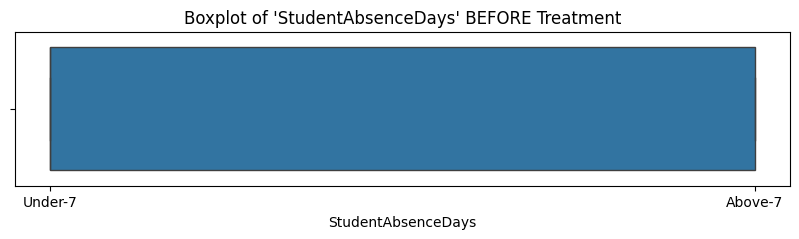

In [5]:
# Part 3: "Before" Cleaning Report
# (This fulfills the 'before' part of Assignment 2)
# -----------------------------------------------------------------------
print("\n--- Part 3: 'BEFORE' Cleaning Report ---")

print("\n[1. Data Info (Dtypes and Non-Null Counts)]")
df.info()

print("\n[2. Missing Values Check]")
print(df.isnull().sum())
print(f"\nTotal Missing Values: {df.isnull().sum().sum()}")

print("\n[3. Duplicate Rows Check]")
print(f"Total Duplicate Rows: {df.duplicated().sum()}")

print("\n[4. Descriptive Statistics (Numerical)]")
# Get statistics for numerical columns
print(df.describe())

print("\n[5. Value Counts (Categorical)]")
# Check unique values in categorical columns to spot inconsistencies
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n--- Values for '{col}' ---")
    print(df[col].value_counts())

print("\n[6. 'Before' Outlier Visualization (StudentAbsenceDays)]")
# --- THIS IS THE FIX ---
# The original column name is 'StudentAbsenceDays', not 'Absences'
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['StudentAbsenceDays'])
plt.title("Boxplot of 'StudentAbsenceDays' BEFORE Treatment")
plt.show()

In [6]:
# Part 4: Applying Cleaning Steps
# (This fulfills the 'Class Task' and 'Assignment 2')
# -----------------------------------------------------------------------
print("\n--- Part 4: Applying Cleaning Steps ---")

# Create a copy to avoid SettingWithCopyWarning
df_cleaned = df.copy()

# Step 1: Standardize Column Names
# (e.g., 'raisedhands' -> 'raised_hands', 'ParentAnsweringSurvey' -> 'parent_answering_survey')
print("[Cleaning Step 1: Standardizing column names...]")
# Renaming original columns to a clean, standard format
df_cleaned.rename(columns={
    'gender': 'gender',
    'NationalITy': 'nationality',
    'PlaceofBirth': 'place_of_birth',
    'StageID': 'stage_id',
    'GradeID': 'grade_id',
    'SectionID': 'section_id',
    'Topic': 'topic',
    'Semester': 'semester',
    'Relation': 'relation',
    'raisedhands': 'raised_hands',
    'VisITedResources': 'visited_resources',
    'AnnouncementsView': 'announcements_view',
    'Discussion': 'discussion',
    'ParentAnsweringSurvey': 'parent_answering_survey',
    'ParentschoolSatisfaction': 'parent_school_satisfaction',
    'StudentAbsenceDays': 'student_absence_days',
    'Class': 'class_label'
}, inplace=True)
print("Standardized all column names.")

# Step 2: Handle Missing Values
# (Based on our 'Before' report, there are 0 missing values, so we just document this)
print("[Cleaning Step 2: Handling missing values...]")
missing_count = df_cleaned.isnull().sum().sum()
if missing_count == 0:
    print("No missing values found. No action needed.")
else:
    print(f"Found {missing_count} missing values. (Add imputation/dropping logic here)")

# Step 3: Remove Duplicates
print("[Cleaning Step 3: Removing duplicates...]")
dups_found = df_cleaned.duplicated().sum()
df_cleaned = df_cleaned.drop_duplicates()
print(f"Removed {dups_found} duplicate rows.")

# Step 4: Treat Outliers / Inconsistent Data
# We'll treat outliers in 'student_absence_days'
print("[Cleaning Step 4: Converting 'student_absence_days' to numerical...]")
col_to_treat = 'student_absence_days'

# Convert 'Under-7' and 'Above-7' to numerical values (0 and 1)
# This is a crucial cleaning step
df_cleaned[col_to_treat] = df_cleaned[col_to_treat].map({'Under-7': 0, 'Above-7': 1})
print("Converted 'student_absence_days' from text ('Under-7'/'Above-7') to numerical (0/1).")

# ---
# NOTE: After conversion, 'student_absence_days' is now binary (0 or 1),
# so outlier treatment with IQR is not appropriate for this column.
# Let's demonstrate the outlier treatment technique on 'raised_hands' instead.
# ---
print("\n[Cleaning Step 4 (Revised): Treating outliers in 'raised_hands'...]")
col_to_treat_demo = 'raised_hands'
Q1 = df_cleaned[col_to_treat_demo].quantile(0.25)
Q3 = df_cleaned[col_to_treat_demo].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers before clipping
outliers_count = ((df_cleaned[col_to_treat_demo] < lower_bound) | (df_cleaned[col_to_treat_demo] > upper_bound)).sum()
print(f"Found {outliers_count} outliers in '{col_to_treat_demo}' (values < {lower_bound:.2f} or > {upper_bound:.2f}).")

# Clip the values (cap them at the upper/lower bound)
df_cleaned[col_to_treat_demo] = df_cleaned[col_to_treat_demo].clip(lower=lower_bound, upper=upper_bound)
print(f"Clipped outliers in '{col_to_treat_demo}' to be within the range [{lower_bound:.2f}, {upper_bound:.2f}].")


# Step 5: Data Type Conversion
# (Converting text 'Yes'/'No' and 'Good'/'Bad' to 1/0 is better for modeling)
print("\n[Cleaning Step 5: Encoding binary categorical features...]")
df_cleaned['parent_answering_survey'] = df_cleaned['parent_answering_survey'].map({'Yes': 1, 'No': 0})
df_cleaned['parent_school_satisfaction'] = df_cleaned['parent_school_satisfaction'].map({'Good': 1, 'Bad': 0})
print("Mapped 'parent_answering_survey' (Yes/No) to (1/0).")
print("Mapped 'parent_school_satisfaction' (Good/Bad) to (1/0).")


--- Part 4: Applying Cleaning Steps ---
[Cleaning Step 1: Standardizing column names...]
Standardized all column names.
[Cleaning Step 2: Handling missing values...]
No missing values found. No action needed.
[Cleaning Step 3: Removing duplicates...]
Removed 2 duplicate rows.
[Cleaning Step 4: Converting 'student_absence_days' to numerical...]
Converted 'student_absence_days' from text ('Under-7'/'Above-7') to numerical (0/1).

[Cleaning Step 4 (Revised): Treating outliers in 'raised_hands'...]
Found 0 outliers in 'raised_hands' (values < -72.50 or > 163.50).
Clipped outliers in 'raised_hands' to be within the range [-72.50, 163.50].

[Cleaning Step 5: Encoding binary categorical features...]
Mapped 'parent_answering_survey' (Yes/No) to (1/0).
Mapped 'parent_school_satisfaction' (Good/Bad) to (1/0).



--- Part 5: 'AFTER' Cleaning Report ---

[1. Data Info (Dtypes and Non-Null Counts)]
<class 'pandas.core.frame.DataFrame'>
Index: 478 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   gender                      478 non-null    object
 1   nationality                 478 non-null    object
 2   place_of_birth              478 non-null    object
 3   stage_id                    478 non-null    object
 4   grade_id                    478 non-null    object
 5   section_id                  478 non-null    object
 6   topic                       478 non-null    object
 7   semester                    478 non-null    object
 8   relation                    478 non-null    object
 9   raised_hands                478 non-null    int64 
 10  visited_resources           478 non-null    int64 
 11  announcements_view          478 non-null    int64 
 12  discussion               

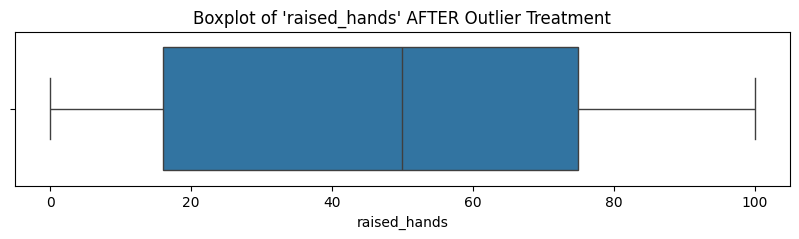

In [7]:
# Part 5: "After" Cleaning Report
# (This fulfills the 'after' part of Assignment 2)
# -----------------------------------------------------------------------
print("\n--- Part 5: 'AFTER' Cleaning Report ---")

print("\n[1. Data Info (Dtypes and Non-Null Counts)]")
df_cleaned.info()

print("\n[2. Missing Values Check]")
print(df_cleaned.isnull().sum())
print(f"\nTotal Missing Values: {df_cleaned.isnull().sum().sum()}")

print("\n[3. Duplicate Rows Check]")
print(f"Total Duplicate Rows: {df_cleaned.duplicated().sum()}")

print("\n[4. Descriptive Statistics (Numerical)]")
# Note the changes in 'raised_hands' (max) and 'student_absence_days' (now 0/1)
print(df_cleaned.describe())

print("\n[5. 'After' Outlier Visualization (raised_hands)]")
plt.figure(figsize=(10, 2))
sns.boxplot(x=df_cleaned['raised_hands'])
plt.title("Boxplot of 'raised_hands' AFTER Outlier Treatment")
plt.show()

In [8]:
# Part 6: Save Cleaned Dataset (Project Milestone)
# (This fulfills the Week 2 Project Milestone)
# -----------------------------------------------------------------------
print("\n--- Part 6: Saving Cleaned Dataset to File ---")

output_filename = 'student_performance_cleaned.csv'
df_cleaned.to_csv(output_filename, index=False)

print(f"\nSuccessfully saved cleaned data to '{output_filename}'.")
print(f"REMINDER: Upload this file and your notebook to your GitHub repository to complete your Week 2 Milestone.")


--- Part 6: Saving Cleaned Dataset to File ---

Successfully saved cleaned data to 'student_performance_cleaned.csv'.
REMINDER: Upload this file and your notebook to your GitHub repository to complete your Week 2 Milestone.
